# Questão Extra

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 01/02/2021

In [1]:
from numpy.fft import rfft2, irfft2
import matplotlib.pyplot as plt
import numpy as np

## Letter a)

First, let's load the data:

In [2]:
data = np.loadtxt('../Dados Auxiliares/blur.txt')

Let's use the `imshow()` function to plot the data as a density graph (which is exactly what the question is asking for):

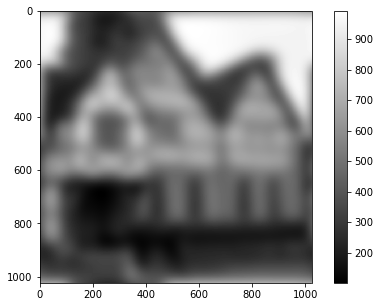

In [3]:
plt.figure(figsize=(8,5))

plt.imshow(data)
plt.colorbar()
plt.gray()

## Letter b)

Let's start by defining the necessary constants:

In [4]:
sigma = 25

x, y = data.shape
print('The size of image is', x, 'X', y)

The size of image is 1024 X 1024


Now we create an array of the same size as the data:

In [5]:
grid_sample_array = np.zeros([x, y])

We define the point spread function:

In [6]:
def f(x,y):
    c1 = np.exp(- (x**2 + y**2) / (2*sigma**2))               # c = corner, so we have 4 c equations for each corner
    c2 = np.exp(- ((x-1024)**2 + y**2) / (2*sigma**2))        # then just add them together for entire function
    c3 = np.exp(- (x**2 + (y-1024)**2) / (2*sigma**2))
    c4 = np.exp(- ((x-1024)**2 + (y-1024)**2) / (2*sigma**2))
    
    return c1 + c2 + c3 + c4

Now we really fill the matrix:

In [7]:
for i in range(0, x, 1):
    for j in range(0, y, 1):
        grid_sample_array[i, j] = f(i, j)

Now we plot again using the `imshow()` function:

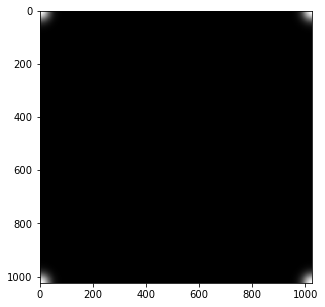

In [8]:
plt.figure(figsize=(8,5))

plt.imshow(grid_sample_array)
plt.gray()

## Letter c)

The steps i) and ii) is above.

For the step iii): Fourier Transform blurred photo and the `grid_sample_array`:

In [9]:
ft_b = rfft2(data)                   # Fourier Transform blurred
ft_gsa = rfft2(grid_sample_array)    # Fourier Transform grid sample array

For the step iv): Divides one by the other:

In [10]:
epsilon = 1e-3

div =  np.zeros([x, y // 2 + 1], complex)

for i in range(x):
    for j in range(y // 2 + 1):
        
        if ft_gsa[i,j] < epsilon:
            div[i,j] = ft_b[i,j]
        else:
            div[i,j] = ft_b[i,j] / ft_gsa[i,j]

For the step v): Perform invers transform:

In [11]:
ift_div = irfft2(div)

Finallty, let's go to the plot:

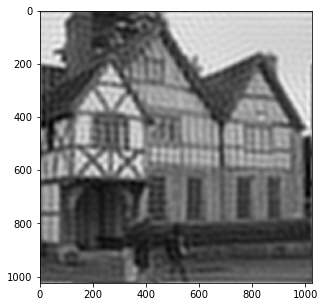

In [12]:
plt.figure(figsize=(8,5))

plt.imshow(ift_div)

## Letter d)

I guess what limits our ability is the point spread funcion. And maybe, more specifically, the Fourier Transform of it. There will always come a point where we will get to such small values that we have to leave the coefficients alone.

$\square$